<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Обучение-на-исходных-данных" data-toc-modified-id="Обучение-на-исходных-данных-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Обучение на исходных данных</a></span></li><li><span><a href="#Обучение-на-зашифрованных-данных" data-toc-modified-id="Обучение-на-зашифрованных-данных-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Обучение на зашифрованных данных</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

**Цель проекта** - предложить алгоритм по шифрованию персональных данных клиентов.

**Ход проекта**

Структура проекта будет состоять из следующих этапов:
1. Загрузка и осмотр данных;
2. Теоретическое обоснование предложенного метода шифрования;
3. Проверка алгоритма на данных;
4. Вывод.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_spd_matrix
from sklearn.metrics import r2_score

Загрузим данные.

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

Посмотрим на 10 случайных наблюдений из датасета.

In [3]:
data.sample(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
3888,1,25.0,48900.0,0,0
4148,0,39.0,19300.0,0,0
728,0,40.0,32500.0,1,0
4266,0,32.0,50400.0,1,0
3966,1,23.0,40200.0,2,0
2699,0,40.0,39400.0,3,0
1600,1,27.0,40700.0,0,0
1586,1,23.0,18700.0,1,0
3723,0,37.0,41500.0,3,0
4558,0,37.0,33200.0,1,0


Посмотрим на типы данных, а так же проверим наличие пропусков.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Проверим наличие дубликатов.

In [5]:
data.duplicated().sum()

153

In [6]:
data = data.drop_duplicates().reset_index(drop=True)

Переименуем столбцы в соотстветствии с правилами наименования.

In [7]:
data.columns = ['sex', 'age', 'salary', 'family_size', 'insurance_payment']

Посмотрим на распределения в датасете.

In [8]:
data.describe()

,sex,age,salary,family_size,insurance_payment
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


А так же посмотрим на визуальные распределения признаков в данных.

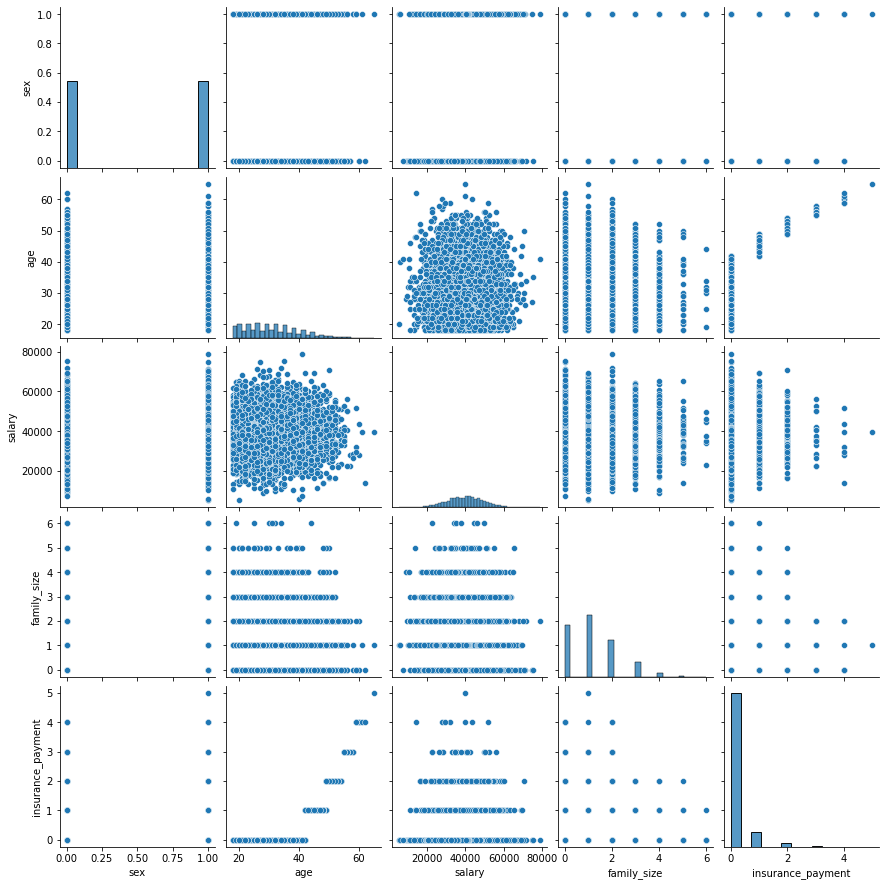

In [9]:
sns.pairplot(data);

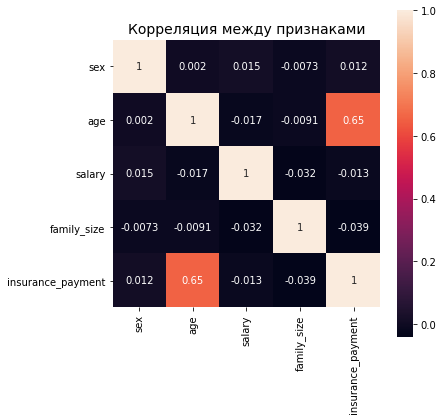

In [10]:
plt.figure(figsize = (6,6))
plt.title('Корреляция между признаками', size=14)
sns.heatmap(data.corr(), annot = True, square=True);

**Вывод**:

1. В данных отсутствовали пропуски;
2. Столбцы в датасете были переименованы;
3. В данных присутствовали дубликаты, которые были удалены;
4. В данных присутствует только один категориальный признак - Пол (Sex), остальные - количественные;
5. Признак age имеет значительную корреляюцию с целевым признаком insurance_payment.

## Умножение матриц

Для обеспечения сохранности персональной информации необходимо разработать такой метод преобразования данных, чтобы по данным было сложно восстановить информацию.
Метод преобразования будет заключатся в матричном умножении матрицы объект-признак на случайно-сгенерированную обратимую матрицу.

Докажем корректность данного метода.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Обозначим новую матрицу объект-признак:
$$
X' = XP
$$

Тогда новый вектор весов будет рассчитываться:
$$
w' = (X'^T X')^{-1} X'^T y
$$

Произведем замену:
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

Воспользуемся свойствами матриц, а именно:
1. Свойство ассоциативности произведения матриц $ A(BC) = (AB)C $
2. Свойство транспонирования произведения матрицы $ (A B)^T = B^T A^T $
3. Свойство обратной матрицы $ (A B)^{-1} = B^{-1} A^{-1} $
4. Произведение матрицы на ее обратную матрицу даст единичную матрицу $ A A^{-1} = E $

Перепишем равенство:
$$
w' = (P^T X^T X P)^{-1} P^T X^T y
$$

Раскрыв скобки получим:
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Таким образом:
$$
w' = P^{-1}w
$$

Тогда формула для предсказаний будет иметь вид:
$$
a' = X'w' = X P P^{-1}w = Xw
$$

Следовательно, умножение матрицы объект-признак на обратимую матрицу не приведет к изменению качества предсказания линейной регрессии.

## Алгоритм преобразования

Доказав метод шифрования, приведенный выше, создадим алгоритм для шифрования данных.

**Алгоритм**

1. Методом `make_spd_matrix` создаем шифрующую матрицу A;
2. Методом `np.linalg.inv()` проверяем шифрующую матрицу A на обратимость и получаем обратную матрицу, которая потребуется для дешифровки. Если матрица оказалась вырожденной, создаем новую матрицу;
3. Умножаем матрицу объект-признак X на полученную матрицу A и получаем матрицу B с закодированными данными о клиентах
$$
B = X @ A
$$

**Обоснование**

Данный алгоритм позволит защитить персональные данные клиентов, при этом не повлияв на качество модели.

## Проверка алгоритма

Зафиксируем параметр seed

In [11]:
SEED = 17

Выделим признаки и целевой признак из данных

In [12]:
features, target = data.drop(columns=['insurance_payment']), data['insurance_payment']

Посмотрим на размерность данных

In [13]:
print('Размерность пространства признаков:', features.shape)
print('Размерность целевого признака:', target.shape)

Размерность пространства признаков: (4847, 4)
Размерность целевого признака: (4847,)


Создадим матрицы

In [14]:
features_matrix = features.values
target_matrix = target.values

Создадим шифрующую матрицу

In [15]:
encryption_matrix = make_spd_matrix(n_dim=4, random_state=SEED)

Проверим шифрующую матрицу на обратимость.

In [16]:
np.linalg.inv(encryption_matrix)

array([[ 1.45811097,  0.15074934, -0.83419224, -0.47418602],
       [ 0.15074934,  1.84914271,  0.35039822,  0.03842006],
       [-0.83419224,  0.35039822,  0.9200942 ,  0.22967318],
       [-0.47418602,  0.03842006,  0.22967318,  2.59540419]])

Умножим матрицу объект-признак на шифрующую матрицу.

In [17]:
encoded_features = features_matrix @ encryption_matrix

### Обучение модели

Обучим 2 вида модели:
1. На изначальных данных;
2. На зашифрованных данных.

Затем, сравнив результаты по метрике `r2_score` подтвердим/опровергнем работоспособность шифрующего алгоритма.

#### Обучение на исходных данных

Разобьем данные на тестовую и валидационную выборки.

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25,
                                                      random_state=SEED)

In [19]:
len(features) == len(X_train) + len(X_valid)

True

Обучим модель и посчитаем `r2_score`

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predict = lr.predict(X_valid)
r2 = r2_score(y_valid, predict)
print('Метрика R2 на исходных данных', r2)

Метрика R2 на исходных данных 0.4247967914840529


#### Обучение на зашифрованных данных

In [21]:
X_train_enc, X_valid_enc, y_train_enc, y_valid_enc = train_test_split(encoded_features,
                                                                      target, 
                                                                      test_size=0.25,
                                                                      random_state=SEED)

In [22]:
len(encoded_features) == len(X_train_enc) + len(X_valid_enc)

True

In [23]:
lr_enc = LinearRegression()
lr_enc.fit(X_train_enc, y_train_enc)

predict_enc = lr_enc.predict(X_valid_enc)
r2_score_enc = r2_score(y_valid_enc, predict_enc)
print('Метрика R2 на зашифрованных данных', r2_score_enc)

Метрика R2 на зашифрованных данных 0.42479679148539995


Сравним результаты метрики R2 до и после преобразования данных.

In [24]:
print('R2 на исходных данных:', r2)
print('R2 на зашифрованных данных:', r2_score_enc)

R2 на исходных данных: 0.4247967914840529
R2 на зашифрованных данных: 0.42479679148539995


Метрики практически не изменились. Значит, предложенный метод шифрования данных работает и не ухудшает качество линейной регрессии.
Так же стоит ответить, что показатель R2 вменяем (находится в диапазоне от 0 до 1), но достаточно низкий.

## Вывод

Целью данного проекта была разработка алгоритма шифромания данных для защиты персональных данных клиентов.

В ходе осмотра в данных выявились дубликаты, которые были удалены. Пропуски отсутствовали. Так же были переименованы столбцы.

Был предложен метод шифрования данных - умножение матрицы объект-признак на матрицу, которая имеет обратную. Теоретически было доказано, что данное преобразование не ухудшит результат предсказания.

Затем этот метод был эксперементально подтвержден, сравнение производилось по метрике R2. Значительных изменений в метрике не обнаружилось.